#Solucion

## Librerias

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Aumentar ancho de visualizacion
pd.set_option('display.width', 1000)

### Carga del DataFrame
- Cargar datos desde CSV, Excel, base de datos, etc.

In [16]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/GabrielBellesi-edu/AA2A1C-25/refs/heads/main/clase_4/datos/usuarios_win_mac_lin.csv')

### Revisión del DataFrame
- Revisar dimensiones (df.shape) y primeras filas (df.head()).
- Ver tipos de datos (df.dtypes) y nulos (df.isnull().sum()).

In [17]:
dataframe.shape

(170, 5)

In [18]:
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [19]:
dataframe.dtypes

,0
duracion,float64
paginas,int64
acciones,int64
valor,int64
clase,int64


In [20]:
dataframe.isnull().sum()

,0
duracion,0
paginas,0
acciones,0
valor,0
clase,0


### Análisis exploratorio (EDA)
- Estadísticas descriptivas (df.describe()).
- Visualización de distribución de variables (histogramas, boxplots).
- Identificación de outliers.

In [21]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [22]:
print(dataframe.groupby('clase').size())
# Clase 0 = Windows
# Clase 1 = Mac
# Clase 2 = Linux


clase
0    86
1    40
2    44
dtype: int64


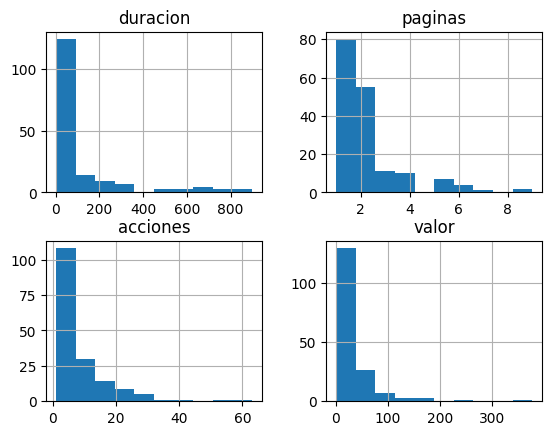

In [23]:
dataframe.drop(['clase'],axis=1).hist()
plt.show()

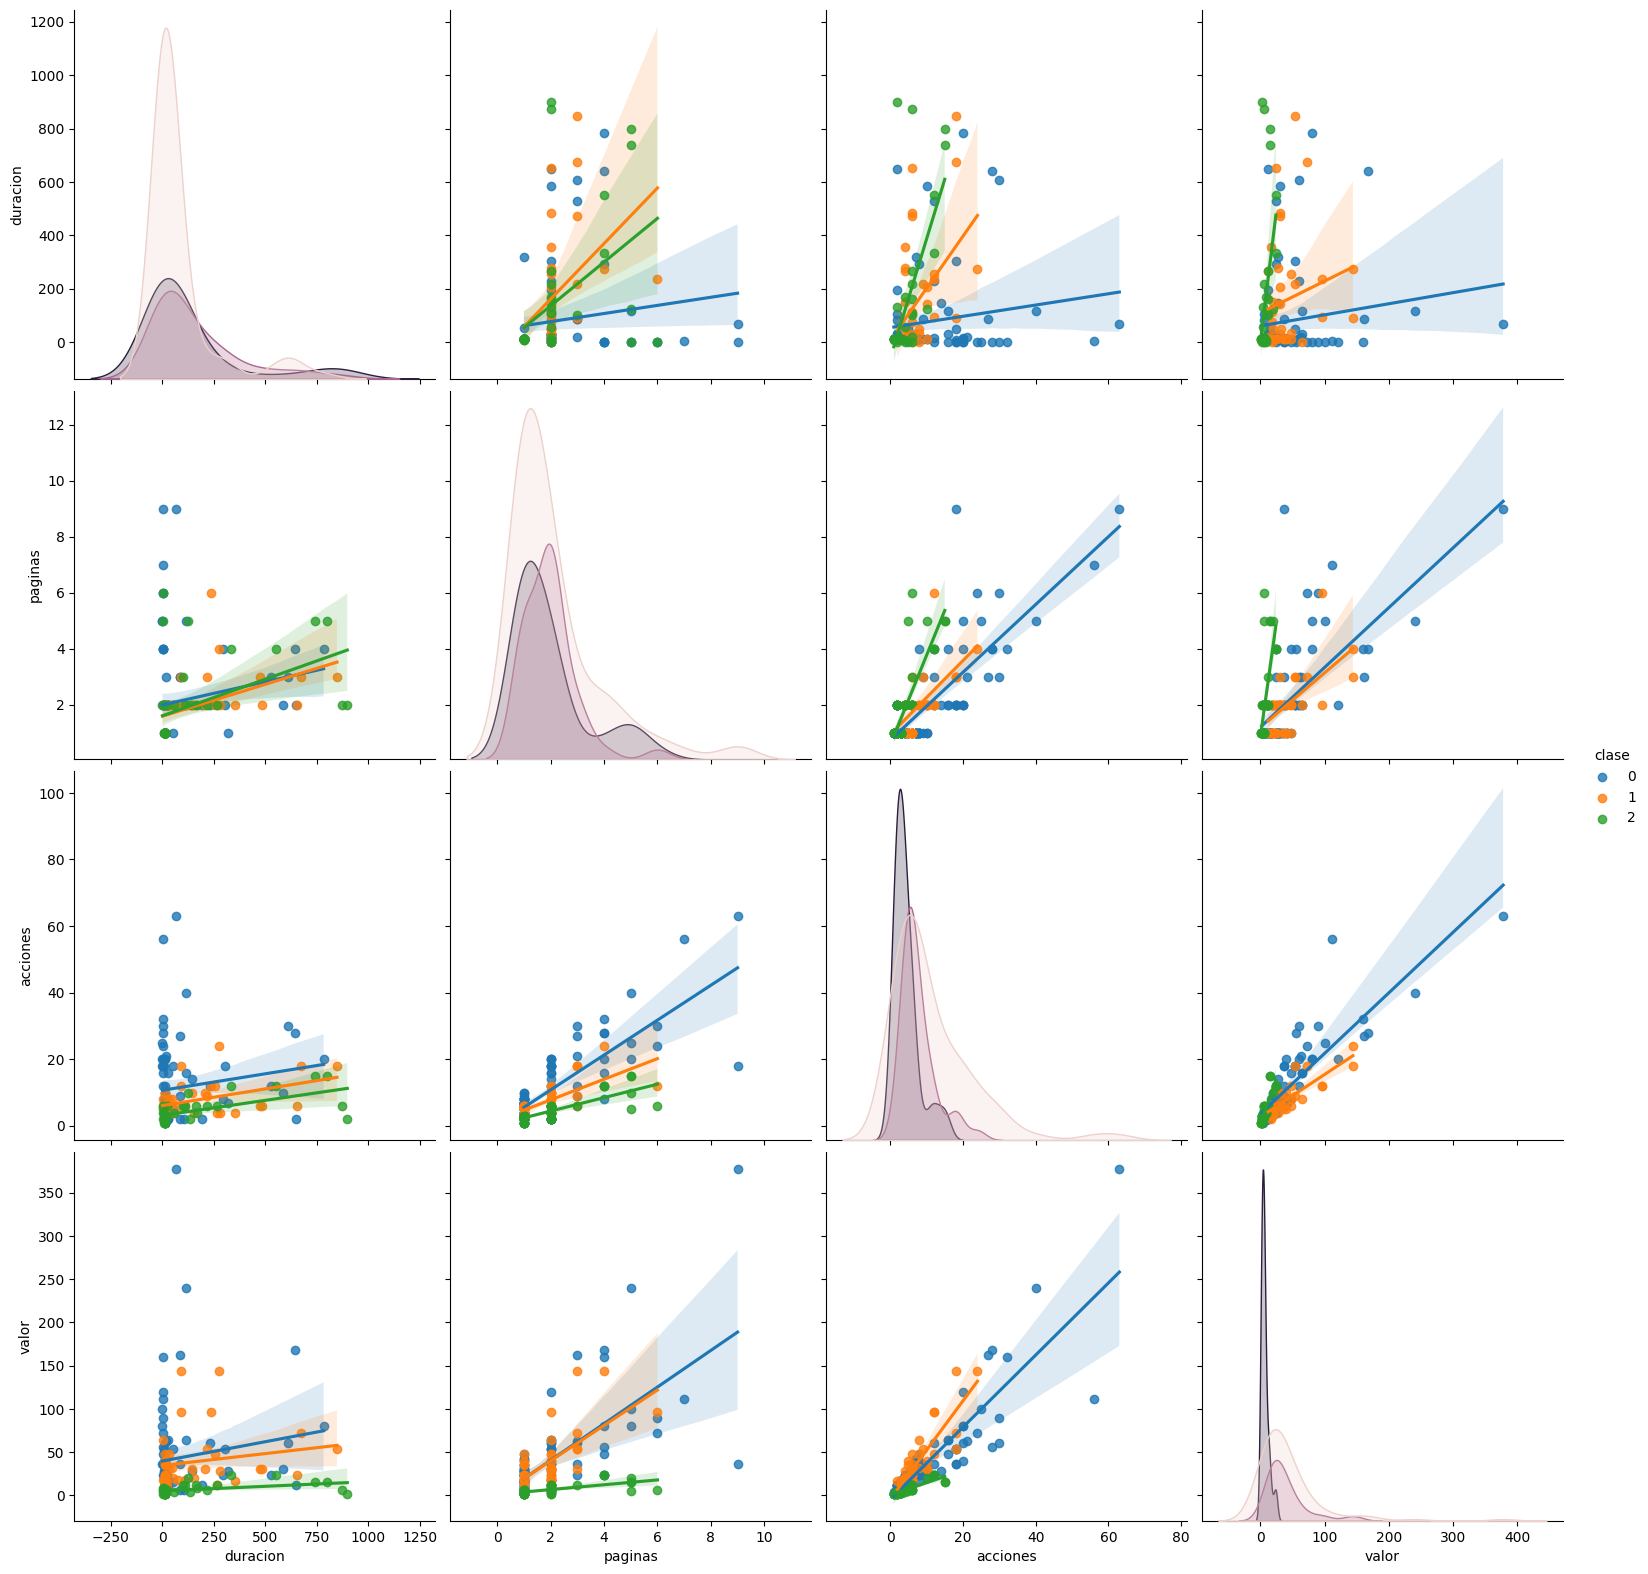

In [24]:
sns.pairplot(dataframe.dropna(), hue='clase',height=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

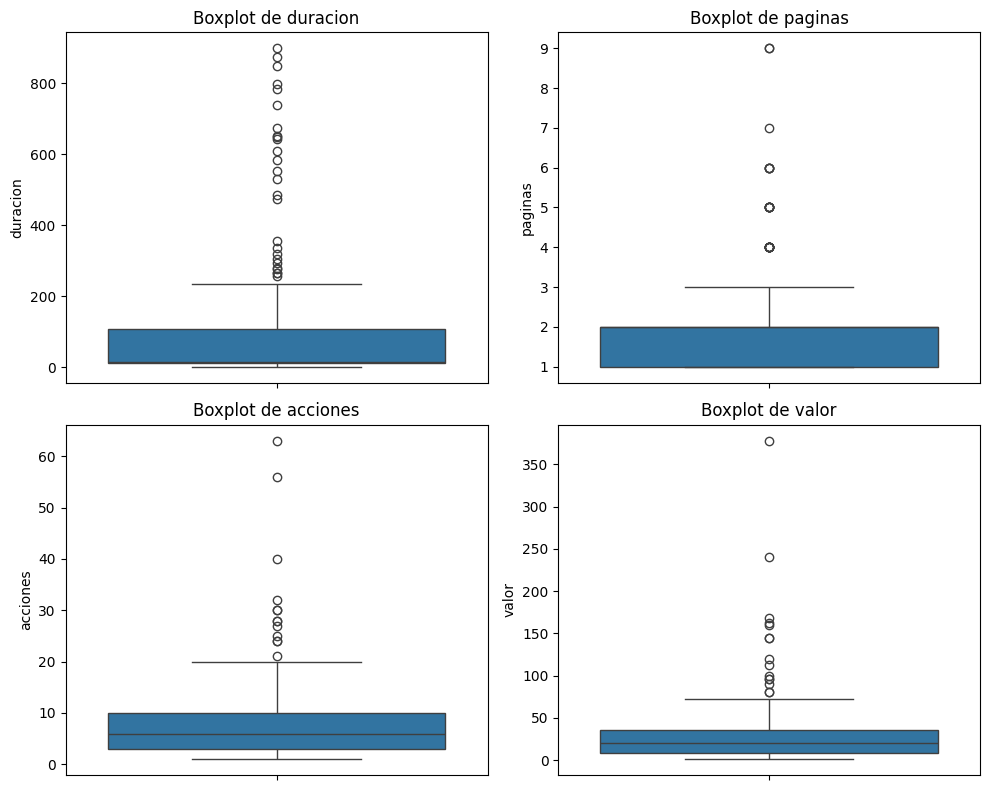

In [29]:
columnas = ['duracion', 'paginas', 'acciones', 'valor']

fig, axes = plt.subplots(2, 2, figsize=(10,8))  # 2 filas x 2 columnas

# Aplanamos axes para iterar más fácilmente
axes = axes.flatten()

for i, col in enumerate(columnas):
    sns.boxplot(y=dataframe[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

plt.tight_layout()  # Ajusta los espacios para que no se superpongan los títulos
plt.show()


### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [ ]:
# Separamos las variables predictoras (X) y la variable objetivo (y)
X = dataframe.drop("clase", axis=1)
y = dataframe["clase"]
X.shape

(170, 4)

### División de datos
- Separar en train/test (train_test_split).

In [ ]:
# Dividimos en datos de entrenamiento y prueba
size=0.25
seed=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=seed)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema
- Entrenar el modelo con datos de entrenamiento (fit).


In [ ]:
# Modelo_1
#solver = lbfgs  (para dataset grandes)
#max_iter=1000  (más seguro para convergencia. 100 default)
Modelo_1 = LogisticRegression(max_iter=1000)
Modelo_1.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#Modelo_2
# solver = liblinear ( para dataset chicos )
# max_iter=1000
Modelo_2 = LogisticRegression(max_iter=1000, solver='liblinear')
Modelo_2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
#Modelo_3
# solver = liblinear
# max_iter=100
Modelo_3 = LogisticRegression(solver='liblinear')
Modelo_3.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Modelo_4
# solver = lbfgs para dataset grandes
# max_iter=100
Modelo_4 = LogisticRegression()
Modelo_4.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Modelo_5
# multi_class="multinomial" (No se usa mas, siempre se usa asi, por lo cual deberia dar igual al modelo 1)
Modelo_5 = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")
Modelo_5.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas:
  -  Regresión: RMSE, MAE, R².
  - Clasificación: Accuracy, Precision, Recall, F1-score.
- Matriz de confusión

#### Modelo 1

In [ ]:
y_pred_so_M1 = Modelo_1.predict(X_test)

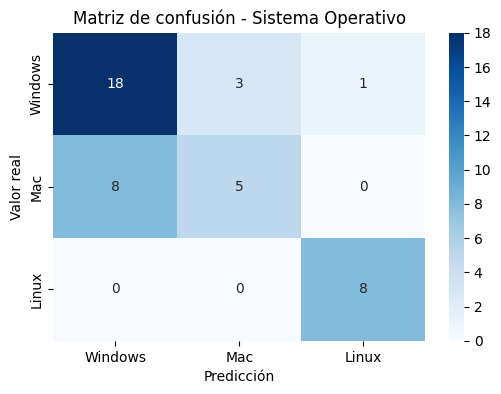

In [ ]:
cm_so_m1 = confusion_matrix(y_test, y_pred_so_M1)
plt.figure(figsize=(6,4))
sns.heatmap(cm_so_m1, annot=True, fmt="d", cmap="Blues", xticklabels=["Windows", "Mac", "Linux"], yticklabels=["Windows", "Mac", "Linux"])
plt.title("Matriz de confusión - Sistema Operativo")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_so_M1))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.62      0.38      0.48        13
           2       0.89      1.00      0.94         8

    accuracy                           0.72        43
   macro avg       0.74      0.73      0.72        43
weighted avg       0.71      0.72      0.70        43



#### Modelo 2

In [ ]:
y_pred_so_M2 = Modelo_2.predict(X_test)

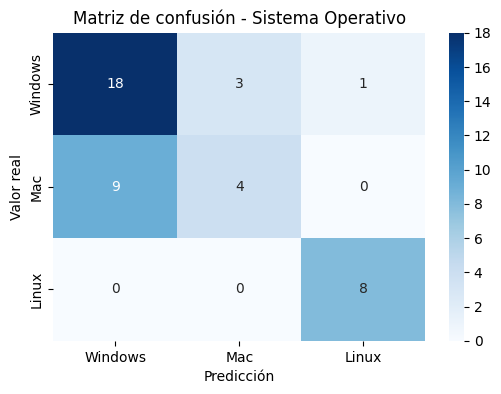

In [ ]:
cm_so_m2 = confusion_matrix(y_test, y_pred_so_M2)
plt.figure(figsize=(6,4))
sns.heatmap(cm_so_m2, annot=True, fmt="d", cmap="Blues", xticklabels=["Windows", "Mac", "Linux"], yticklabels=["Windows", "Mac", "Linux"])
plt.title("Matriz de confusión - Sistema Operativo")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_so_M1))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.62      0.38      0.48        13
           2       0.89      1.00      0.94         8

    accuracy                           0.72        43
   macro avg       0.74      0.73      0.72        43
weighted avg       0.71      0.72      0.70        43



#### Modelo 3

In [ ]:
y_pred_so_M3 = Modelo_3.predict(X_test)

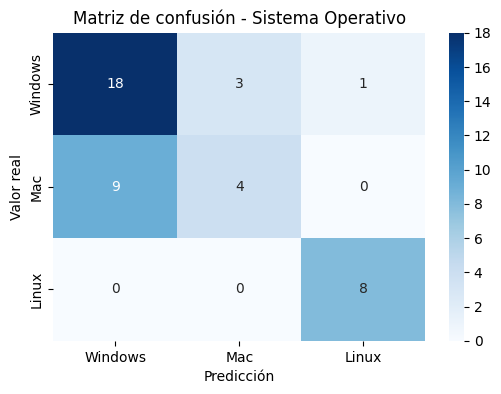

In [ ]:
cm_so_m3 = confusion_matrix(y_test, y_pred_so_M3)
plt.figure(figsize=(6,4))
sns.heatmap(cm_so_m3, annot=True, fmt="d", cmap="Blues", xticklabels=["Windows", "Mac", "Linux"], yticklabels=["Windows", "Mac", "Linux"])
plt.title("Matriz de confusión - Sistema Operativo")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_so_M3))

              precision    recall  f1-score   support

           0       0.67      0.82      0.73        22
           1       0.57      0.31      0.40        13
           2       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.71      0.71      0.69        43
weighted avg       0.68      0.70      0.67        43



#### Modelo 4

In [ ]:
y_pred_so_M4 = Modelo_4.predict(X_test)

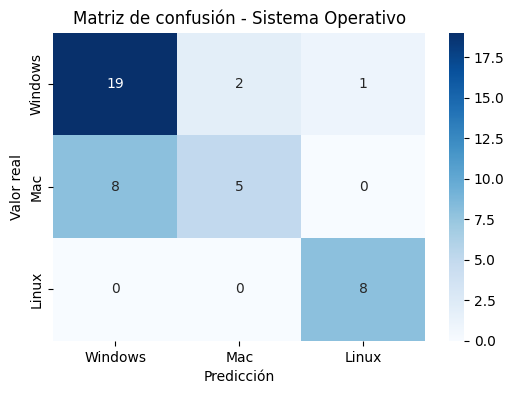

In [ ]:
cm_so_m4 = confusion_matrix(y_test, y_pred_so_M4)
plt.figure(figsize=(6,4))
sns.heatmap(cm_so_m4, annot=True, fmt="d", cmap="Blues", xticklabels=["Windows", "Mac", "Linux"], yticklabels=["Windows", "Mac", "Linux"])
plt.title("Matriz de confusión - Sistema Operativo")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_so_M4))

              precision    recall  f1-score   support

           0       0.70      0.86      0.78        22
           1       0.71      0.38      0.50        13
           2       0.89      1.00      0.94         8

    accuracy                           0.74        43
   macro avg       0.77      0.75      0.74        43
weighted avg       0.74      0.74      0.72        43



#### Modelo 5

In [ ]:
y_pred_so_M5 = Modelo_5.predict(X_test)

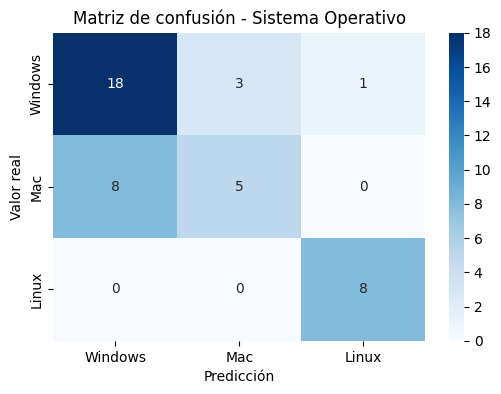

In [ ]:
cm_so_m5 = confusion_matrix(y_test, y_pred_so_M5)
plt.figure(figsize=(6,4))
sns.heatmap(cm_so_m5, annot=True, fmt="d", cmap="Blues", xticklabels=["Windows", "Mac", "Linux"], yticklabels=["Windows", "Mac", "Linux"])
plt.title("Matriz de confusión - Sistema Operativo")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_so_M1))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.62      0.38      0.48        13
           2       0.89      1.00      0.94         8

    accuracy                           0.72        43
   macro avg       0.74      0.73      0.72        43
weighted avg       0.71      0.72      0.70        43



#### Comparacion de Puntaje de los Modelos

In [ ]:
print("Score Modelo_1:", Modelo_1.score(X,y))
print("Score Modelo_2:", Modelo_2.score(X,y))
print("Score Modelo_3:", Modelo_3.score(X,y))
print("Score Modelo_4:", Modelo_4.score(X,y))
print("Score Modelo_5:", Modelo_5.score(X,y))

Score Modelo_1: 0.7647058823529411
Score Modelo_2: 0.7529411764705882
Score Modelo_3: 0.7529411764705882
Score Modelo_4: 0.7705882352941177
Score Modelo_5: 0.7647058823529411


### Prueba del modelo con nuevos datos.


In [ ]:
duracion = 12
paginas = 10
acciones = 12
valor = 50

clases = {0: "Windows", 1: "Mac", 2: "Linux"}

X_nuevo = pd.DataFrame([[duracion, paginas, acciones, valor]], columns=X_train.columns)
prediccion = Modelo_4.predict(X_nuevo)


print("El sistema es",clases[prediccion[0]])



El sistema es Windows
